## Import Library

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import warnings

In [45]:
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set(style="whitegrid")

%matplotlib inline

### 작업 이해하기
------------------------
이 대회의 목표는 신체 활동 데이터 및 기타 특성을 기반으로 아동과 청소년의 문제적 인터넷 사용 수준을 나타내는 **Severity Impairment Index (sii)**를 예측하는 것입니다.

1. Parent-Child Internet Addiction Test (PCIAT)
2. PCIAT: 총 20개의 질문으로 구성된 부모-자녀 인터넷 중독 테스트입니다.
3. PCIAT_Total: 이 대회의 목표 변수인 sii는 이 필드에서 파생되며, 데이터 설명서에 따르면 다음과 같이 정의됩니다:
  - 0: None (없음): PCIAT_Total 점수가 0에서 30 사이일 때
  - 1: Mild (경증): PCIAT_Total 점수가 31에서 49 사이일 때
  - 2: Moderate (중등도): PCIAT_Total 점수가 50에서 79 사이일 때
  - 3: Severe (중증): PCIAT_Total 점수가 80 이상일 때

이를 통해 sii는 0부터 3까지의 범위로, 각기 다른 수준의 인터넷 사용 문제 정도를 나타내며, PCIAT_Total 점수에 따라 구분됩니다.

## DataLoad and Checking DataInfo

In [46]:
train = pd.read_csv('./data/train.csv')

test = pd.read_csv('./data/test.csv')

data_dict = pd.read_csv('./data/data_dictionary.csv')

In [47]:
display(train.head())
print(f"Train shape: {train.shape}")

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


In [48]:
display(test.head())

print(f"Test shape: {test.shape}")

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test shape: (20, 59)


In [49]:
data_dict.head()

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


## Function

In [50]:
def calculate_stats(data, columns):

    # Checking colums type
    if isinstance(columns, str):
        columns = [columns]

    stats = []

    for col in columns:

        if data[col].dtype in ['object', 'category']:

            counts = data[col].value_counts(dropna=False, sort=False)

            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100

            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'

            stats_col = pd.DataFrame({'count (%)': formatted})

            stats.append(stats_col)

        else:

            stats_col = data[col].describe().to_frame().transpose()

            stats_col['missing'] = data[col].isnull().sum()

            stats_col.index.name = col

            stats.append(stats_col)

    return pd.concat(stats, axis=0)

## Data EDA

In [51]:
# Train

train_cols = train.columns
train_cols_set = set(train.columns)

print(f"List Type = {train_cols[:5]}  \nlen : {len(train_cols)}")
# Set은 슬라이싱이 불가하므로, 리스트로 변환해 앞 5개 출력
print(f"Set Type = {list(train_cols_set)[:5]}  \nlen : {len(train_cols_set)}")

List Type = Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season'],
      dtype='object')  
len : 82
Set Type = ['Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Season', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone', 'BIA-BIA_FMI']  
len : 82


In [52]:
# Test
test_cols = test.columns
test_cols_set = set(test.columns)

print(f"List Type = {test_cols[:5]}  \nlen : {len(test_cols)}")
# Set은 슬라이싱이 불가하므로, 리스트로 변환해 앞 5개 출력
print(f"Set Type = {list(test_cols_set)[:5]}  \nlen : {len(test_cols_set)}")

List Type = Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season'],
      dtype='object')  
len : 59
Set Type = ['FGC-FGC_SRL_Zone', 'FGC-Season', 'BIA-BIA_DEE', 'BIA-BIA_Frame_num', 'FGC-FGC_TL_Zone']  
len : 59


In [53]:
columns_not_in_test = sorted(list(train_cols_set-test_cols_set))
data_dict[data_dict['Field'].isin(columns_not_in_test)] # Test set doesn't have  PCIAT Type Columns

,Instrument,Field,Description,Type,Values,Value Labels
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household ch...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationshi...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
59,Parent-Child Internet Addiction Test,PCIAT-PCIAT_05,How often do you complain about the amount of ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
60,Parent-Child Internet Addiction Test,PCIAT-PCIAT_06,How often do your child's grades suffer becaus...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
61,Parent-Child Internet Addiction Test,PCIAT-PCIAT_07,How often does your child check his or her e-m...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
62,Parent-Child Internet Addiction Test,PCIAT-PCIAT_08,How often does your child seem withdrawn from ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
63,Parent-Child Internet Addiction Test,PCIAT-PCIAT_09,How often does your child become defensive or ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."


In [54]:
pciat_min_max = train.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min','max'])
pciat_min_max = pciat_min_max.rename(
                    columns = {'min' : 'Minimun PCIAT total Score', 'max' : 'Maximum total PCIAT Score'})
pciat_min_max

,Minimun PCIAT total Score,Maximum total PCIAT Score
sii,,
0.0,0.0,30.0
1.0,31.0,49.0
2.0,50.0,79.0
3.0,80.0,93.0


In [55]:
data_dict[data_dict['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

'Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe'

In [56]:
train_with_sii = train[train['sii'].notna()] # ~isna() == notna()
train_with_sii

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [57]:
train_with_sii = train[train['sii'].notna()][columns_not_in_test] # ~isna() == notna()

train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,Summer,0.000000
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,Fall,0.000000
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,Fall,1.000000
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,Winter,0.000000
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,Spring,0.000000


In [58]:
train['sii'].unique()

array([ 2.,  0.,  1., nan,  3.])

In [59]:
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]

recalc_total_score = train_with_sii[PCIAT_cols].sum(
    axis=1, skipna=True
)

(recalc_total_score == train_with_sii['PCIAT-PCIAT_Total']).all() # PCIAT Valuse Sum == Total 

True

In [60]:
train.loc[24,'PCIAT-PCIAT_Total']

30.0

In [61]:
train.loc[24,PCIAT_cols].isna().sum() # 1이 나와야함

1

In [63]:
def recalculate_sii(row):
    # PCIAT-PCIAT_Total 값이 결측치인 경우 NaN 반환
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan, np.nan

    # 최대 가능한 점수 계산
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5

    # 디버깅용 출력 (필요 없으면 제거 가능)
    print(f"PCIAT-PCIAT_Total: {row['PCIAT-PCIAT_Total']}")
    print(f"Missing questions: {row[PCIAT_cols].isna().sum()}")
    print(f"Added to max_possible: {row[PCIAT_cols].isna().sum() * 5}")
    print('-' * 80)

    # SII 카테고리 재계산
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return max_possible, 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return max_possible, 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return max_possible, 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return max_possible, 3

    # 범위에 해당하지 않을 경우
    return max_possible, np.nan

# train 데이터프레임에 함수 적용
train[['recalc_total', 'recalc_sii']] = train.apply(
    recalculate_sii, axis=1, result_type='expand'
)


PCIAT-PCIAT_Total: 55.0
Missing questions: 0
Added to max_possible: 0
--------------------------------------------------------------------------------
PCIAT-PCIAT_Total: 0.0
Missing questions: 0
Added to max_possible: 0
--------------------------------------------------------------------------------
PCIAT-PCIAT_Total: 28.0
Missing questions: 0
Added to max_possible: 0
--------------------------------------------------------------------------------
PCIAT-PCIAT_Total: 44.0
Missing questions: 0
Added to max_possible: 0
--------------------------------------------------------------------------------
PCIAT-PCIAT_Total: 34.0
Missing questions: 0
Added to max_possible: 0
--------------------------------------------------------------------------------
PCIAT-PCIAT_Total: 20.0
Missing questions: 0
Added to max_possible: 0
--------------------------------------------------------------------------------
PCIAT-PCIAT_Total: 10.0
Missing questions: 0
Added to max_possible: 0
-------------------------

In [64]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,recalc_total,recalc_sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,55.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,28.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,44.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0,32.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN,NaN,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0,31.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0,19.0,0.0


In [66]:
mismatch_rows = train[

    (train['recalc_sii'] != train['sii']) & train['sii'].notna()

]

mismatch_rows[PCIAT_cols + [

    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'

]].style.applymap(

    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''

)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,recalc_sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,0.000000,nan
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,1.000000,nan
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,0.000000,nan
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,0.000000,nan
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,48.000000,1.000000,nan
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,31.000000,1.000000,nan
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,21.000000,0.000000,nan
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,29.000000,0.000000,nan
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,78.000000,2.000000,nan


In [67]:
train['sii'] = train['recalc_sii']

train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(train[PCIAT_cols].notna().all(axis=1), np.nan) #PCIAT_cols 열에 결측값이 없는 경우에만 'PCIAT-PCIAT_Total' 값을 유지하고, 그렇지 않으면 NaN으로 설정

sii_map = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}

train['sii'] = train['sii'].map(sii_map).fillna('Missing')

sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train['sii'] = pd.Categorical(train['sii'], categories=sii_order, ordered=True) #범주형 변수로 선언, ordered True 일 경우 비교 가능(순서를 명시적으로 설정)

train.drop(columns='recalc_sii', inplace=True)

In [68]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,recalc_total,complete_resp_total
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2 (Moderate),55.0,55.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0 (None),0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0 (None),28.0,28.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1 (Mild),44.0,44.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1 (Mild),32.0,32.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,Winter,0.0,Missing,NaN,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1 (Mild),31.0,31.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0 (None),19.0,19.0


In [69]:
train['sii'].value_counts().reset_index()

,sii,count
0,0 (None),1586
1,Missing,1241
2,1 (Mild),722
3,2 (Moderate),377
4,3 (Severe),34


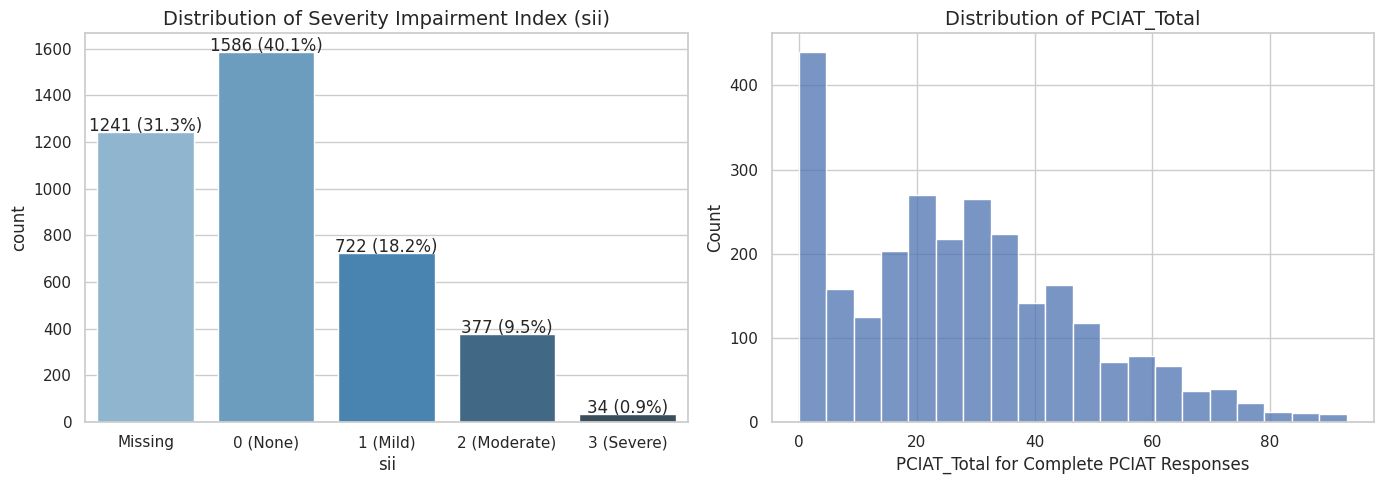

In [71]:
sii_counts = train['sii'].value_counts().reset_index()

total = sii_counts['count'].sum()

sii_counts['percentage'] = (sii_counts['count'] / total) * 100



fig, axes = plt.subplots(1, 2, figsize=(14, 5))



# SII

sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d', ax=axes[0])

axes[0].set_title('Distribution of Severity Impairment Index (sii)', fontsize=14)

for p in axes[0].patches:

    height = p.get_height()

    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]

    axes[0].text(

        p.get_x() + p.get_width() / 2,

        height + 5, f'{int(height)} ({percentage:.1f}%)',

        ha="center", fontsize=12

    )



# PCIAT_Total for complete responses

sns.histplot(train['complete_resp_total'].dropna(), bins=20, ax=axes[1])

axes[1].set_title('Distribution of PCIAT_Total', fontsize=14)

axes[1].set_xlabel('PCIAT_Total for Complete PCIAT Responses')
plt.tight_layout()

plt.show()

# 인터넷 사용 영향 분석 결과

- **40%**: 인터넷 사용으로 인한 문제가 없는 그룹.  
  - 설문 응답 결과, 인터넷 사용이 삶에 부정적인 영향을 미치지 않는 것으로 나타남.

- **31%**: 데이터를 수집할 수 없으므로 분석에서 제외.  
  - 설문에 응답하지 않았거나 불완전한 응답을 한 참가자들로 판단 불가.

- **10%**: 인터넷 사용으로 인해 **중등도에서 심각한 문제**를 겪는 그룹.  
  - 인터넷 사용이 학업, 업무, 사회적 관계 등에서 실질적이고 부정적인 영향을 미친 것으로 보임.

- **307명**: 모든 PCIAT 문항에서 **0점**을 기록한 그룹.  
  - 이들은 인터넷 사용 문제가 전혀 없다고 평가됨.

---

### 요약 및 시사점
- 인터넷 사용은 대부분의 사람들에게 큰 문제가 되지 않지만, 소수(10%)에게는 심각한 영향을 미침.
- **인터넷 중독 예방 및 치료**는 전체를 대상으로 하기보다는 **문제가 있는 소수 집단**에 초점을 맞출 필요가 있음.
